# Exploring Text Data
### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Text Cleaning

## 1. About the Dataset

In [1]:
import pandas as pd

#Load the dataset
df = pd.read_csv('./data/tweets.csv', encoding = 'ISO-8859-1')

In [2]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (14940, 16)


In [3]:
df.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


## 2. Generating Word Frequency

In [4]:
import spacy

In [5]:
# Loading model
nlp=spacy.load('en_core_web_sm')

In [8]:
# Combining tweets into a single string
combined_tweets=' '.join(df.text.values)
len(combined_tweets)

2090159

May recieve this error:

*Text of length 2090159 exceeds maximum of 1000000. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.*

In [13]:
nlp.max_length=len(combined_tweets)+100

In [14]:
# Creating Doc object
doc=nlp(combined_tweets)

In [15]:
# Function for generating word frequency
def gen_freq(tokens):
    
    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    
    # Printing frequencies
    print(word_freq[:20])
    
    return word_freq

In [16]:
# Getting word frequency
word_freq=gen_freq(doc)

#                 13753
:                 13168
RT                11057
                  8816
to                 7661
demonetization     7615
.                  6216
Demonetization     5481
\r\n               5208
is                 5183
,                  4573
in                 4505
the                4342
of                 4060
's                 3041
India              2930
Modi               2828
on                 2768
PM                 2713
-                  2624
dtype: int64


## 3. EDA using Word Clouds
**Note:-** You can install `WordCloud` library by - 

`pip install wordcloud`

In [17]:
#Importing libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [18]:
# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data)
    
    # Setting Figure Size
    plt.figure(figsize=(14,12))
    
    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')
    
    # Removing all the axes
    plt.axis("off")
    
    plt.show()

In [19]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 16138


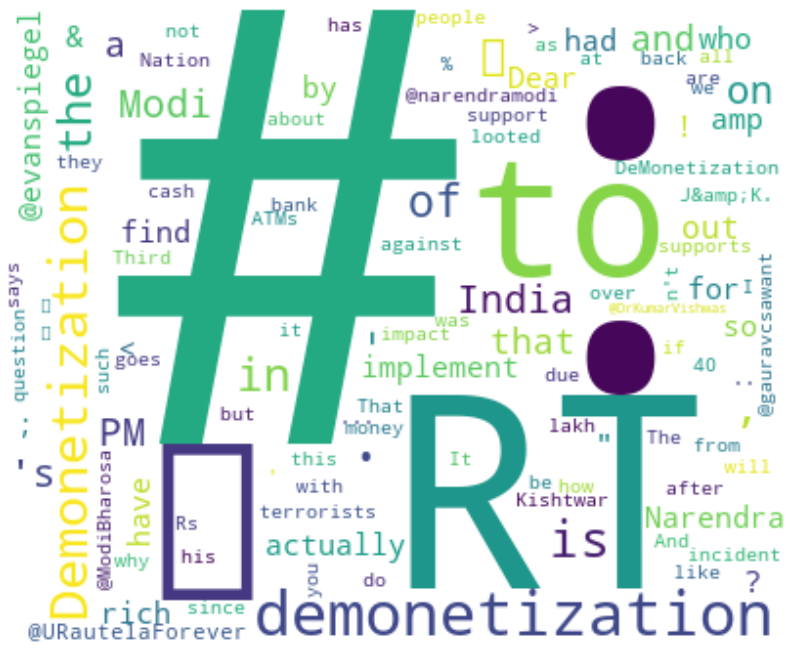

In [20]:
# Generating wordcloud
generate_wordcloud(word_freq)

## 4. Text Cleaning - Part-1

In [14]:
import re

In [15]:
# Removing RT and # from tweets
combined_tweets=re.sub('(RT|#)','',combined_tweets)

In [16]:
# Lowercasing the text
combined_tweets=combined_tweets.lower()

In [17]:
# Creating Doc object
doc=nlp(combined_tweets)

In [18]:
# Removing stopwords and punctuations
tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [19]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4776
                  1626
                 1358
\r\n              1286
india              731
amp                438
modi               402
>                  363
<                  352
@narendramodi      328
money              324
people             318
\r\n\r\n           314
pm                 286
                  284
cash               283
youtube            255
impact             186
black              163
like               163
dtype: int64


In [20]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 14386


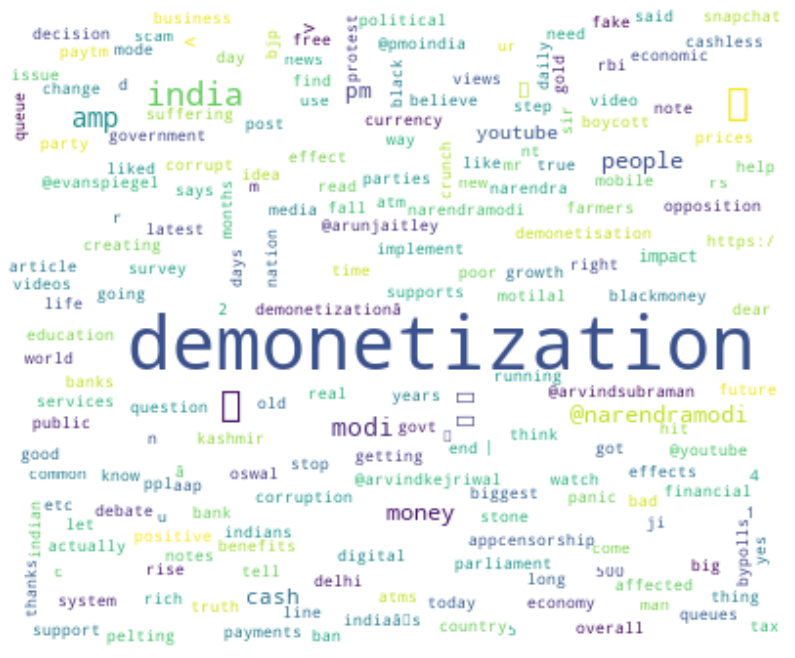

In [21]:
# Generating wordcloud
generate_wordcloud(word_freq)

## Text Cleaning - Part-2

In [22]:
# Combining tokens into a text
combined_tweets=' '.join([token.text for token in tokens])

In [23]:
# Removing "\r\n", "amp", "<", ">" from the text
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)

In [24]:
# Creating Doc object
doc=nlp(combined_tweets)

In [25]:
# Removing whitespaces
tokens=[token for token in doc if (token.is_space==False)]

In [26]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4780
india              731
modi               402
@narendramodi      328
money              325
people             318
pm                 287
cash               283
youtube            255
impact             186
like               163
black              163
digital            153
@youtube           149
support            146
govt               133
u                  127
bjp                127
poor               123
notes              120
dtype: int64


In [27]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 14352


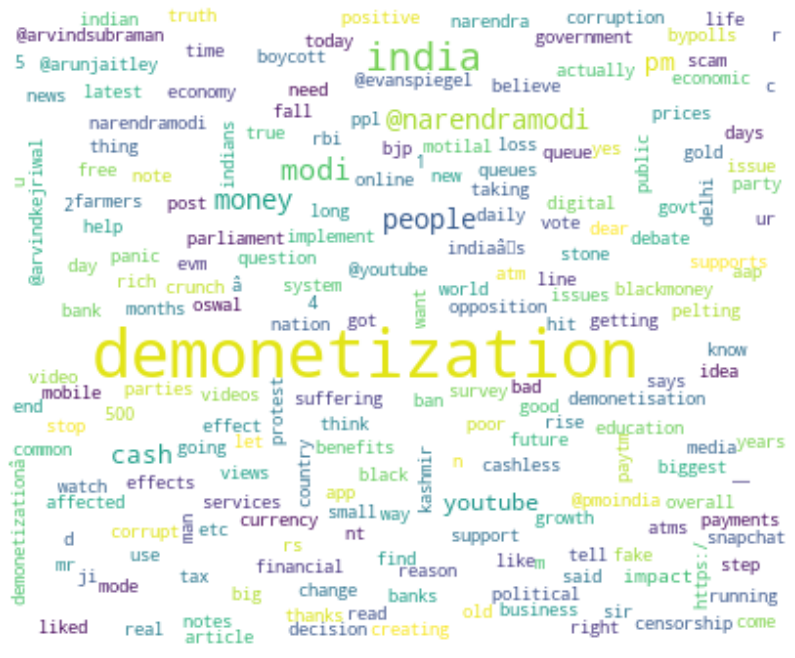

In [28]:
# Generating wordcloud
generate_wordcloud(word_freq)